<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UTS/Clustering_Models_%E2%80%93_grouping_similar_data_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pengumpulan dan Pembersihan Data

In [18]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("UTSClustering.csv", encoding="ISO-8859-1")

print(df.shape)
print(df.info())
print(df.isnull().sum())

Saving UTSClustering.csv to UTSClustering (3).csv
(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [19]:
df = df.dropna(subset=["CustomerID"])

print("Setelah drop CustomerID kosong:")
print(df.shape)
print("Jumlah data per kolom kosong:")
print(df.isnull().sum())


Setelah drop CustomerID kosong:
(406829, 8)
Jumlah data per kolom kosong:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [20]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

print("Setelah konversi waktu & tambah TotalPrice:")
print(df[["InvoiceDate", "TotalPrice"]].head())
print("Cek nilai TotalPrice negatif:", (df["TotalPrice"] < 0).sum())


Setelah konversi waktu & tambah TotalPrice:
          InvoiceDate  TotalPrice
0 2010-12-01 08:26:00       15.30
1 2010-12-01 08:26:00       20.34
2 2010-12-01 08:26:00       22.00
3 2010-12-01 08:26:00       20.34
4 2010-12-01 08:26:00       20.34
Cek nilai TotalPrice negatif: 8905


In [21]:
print(df["Country"].value_counts())


Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [23]:
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",
    "Quantity": "sum",
    "TotalPrice": "sum",
    "InvoiceDate": [np.min, np.max]
})

print("Setelah agregasi:")
print(customer_df.head())
print("Shape:", customer_df.shape)


Setelah agregasi:
           InvoiceNo Quantity TotalPrice         InvoiceDate  \
             nunique      sum        sum                 min   
CustomerID                                                     
12346.0            2        0       0.00 2011-01-18 10:01:00   
12347.0            7     2458    4310.00 2010-12-07 14:57:00   
12348.0            4     2341    1797.24 2010-12-16 19:09:00   
12349.0            1      631    1757.55 2011-11-21 09:51:00   
12350.0            1      197     334.40 2011-02-02 16:01:00   

                                
                           max  
CustomerID                      
12346.0    2011-01-18 10:17:00  
12347.0    2011-12-07 15:52:00  
12348.0    2011-09-25 13:13:00  
12349.0    2011-11-21 09:51:00  
12350.0    2011-02-02 16:01:00  
Shape: (4372, 5)


<ipython-input-23-b0fdbf34b1de>:1: FutureWarning: The provided callable <function min at 0x797ff6f01760> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  customer_df = df.groupby("CustomerID").agg({
<ipython-input-23-b0fdbf34b1de>:1: FutureWarning: The provided callable <function max at 0x797ff6f01620> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  customer_df = df.groupby("CustomerID").agg({


In [24]:
customer_df.head()

InvoiceNo Quantity TotalPrice         InvoiceDate  \
             nunique      sum        sum                 min   
CustomerID                                                     
12346.0            2        0       0.00 2011-01-18 10:01:00   
12347.0            7     2458    4310.00 2010-12-07 14:57:00   
12348.0            4     2341    1797.24 2010-12-16 19:09:00   
12349.0            1      631    1757.55 2011-11-21 09:51:00   
12350.0            1      197     334.40 2011-02-02 16:01:00   

                                
                           max  
CustomerID                      
12346.0    2011-01-18 10:17:00  
12347.0    2011-12-07 15:52:00  
12348.0    2011-09-25 13:13:00  
12349.0    2011-11-21 09:51:00  
12350.0    2011-02-02 16:01:00

In [25]:
customer_df.columns = ["InvoiceCount", "TotalQuantity", "TotalSpent", "FirstPurchase", "LastPurchase"]
print("Setelah rename kolom:")
customer_df.head()

Setelah rename kolom:


,InvoiceCount,TotalQuantity,TotalSpent,FirstPurchase,LastPurchase
CustomerID,,,,,
12346.0,2,0,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00
12347.0,7,2458,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00
12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00
12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00


In [26]:
reference_date = df["InvoiceDate"].max()
customer_df["Recency"] = (reference_date - customer_df["LastPurchase"]).dt.days

print("Setelah hitung Recency:")
print(customer_df[["LastPurchase", "Recency"]].head())
print("Statistik Recency:")
print(customer_df["Recency"].describe())


Setelah hitung Recency:
                  LastPurchase  Recency
CustomerID                             
12346.0    2011-01-18 10:17:00      325
12347.0    2011-12-07 15:52:00        1
12348.0    2011-09-25 13:13:00       74
12349.0    2011-11-21 09:51:00       18
12350.0    2011-02-02 16:01:00      309
Statistik Recency:
count    4372.000000
mean       91.047118
std       100.765435
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64


In [27]:
customer_df = customer_df.drop(columns=["FirstPurchase", "LastPurchase"])
customer_df = customer_df.reset_index()

print("Final dataset per customer:")
print(customer_df.head())
print("Shape:", customer_df.shape)


Final dataset per customer:
   CustomerID  InvoiceCount  TotalQuantity  TotalSpent  Recency
0     12346.0             2              0        0.00      325
1     12347.0             7           2458     4310.00        1
2     12348.0             4           2341     1797.24       74
3     12349.0             1            631     1757.55       18
4     12350.0             1            197      334.40      309
Shape: (4372, 5)


##Feature Selection & Engineering

In [28]:
print("Kolom yang tersedia untuk clustering:")
print(customer_df.columns)

print("\nStatistik awal fitur:")
print(customer_df.describe())


Kolom yang tersedia untuk clustering:
Index(['CustomerID', 'InvoiceCount', 'TotalQuantity', 'TotalSpent', 'Recency'], dtype='object')

Statistik awal fitur:
         CustomerID  InvoiceCount  TotalQuantity     TotalSpent      Recency
count   4372.000000   4372.000000    4372.000000    4372.000000  4372.000000
mean   15299.677722      5.075480    1122.344007    1898.459701    91.047118
std     1722.390705      9.338754    4672.790720    8219.345141   100.765435
min    12346.000000      1.000000    -303.000000   -4287.630000     0.000000
25%    13812.750000      1.000000     153.000000     293.362500    16.000000
50%    15300.500000      3.000000     365.000000     648.075000    49.000000
75%    16778.250000      5.000000     962.250000    1611.725000   142.000000
max    18287.000000    248.000000  196719.000000  279489.020000   373.000000


In [29]:
# Hitung variasi per fitur (selain CustomerID)
from sklearn.feature_selection import VarianceThreshold

X = customer_df.drop(columns=["CustomerID"])
selector = VarianceThreshold(threshold=0.01)  # <1% variansi = hampir konstan
selector.fit(X)

# Tampilkan fitur yang lolos threshold
selected_features = X.columns[selector.get_support()]
removed_features = X.columns[~selector.get_support()]

print("Fitur yang dihapus karena hampir konstan:")
print(list(removed_features))

# Update dataset hanya dengan fitur terpilih
X = X[selected_features]


Fitur yang dihapus karena hampir konstan:
[]


In [30]:
# Cek fitur yang isinya sama
duplicated_cols = X.T.duplicated()
print("Fitur duplikat yang dihapus:", list(X.columns[duplicated_cols]))

# Hapus jika ada
X = X.loc[:, ~duplicated_cols]


Fitur duplikat yang dihapus: []


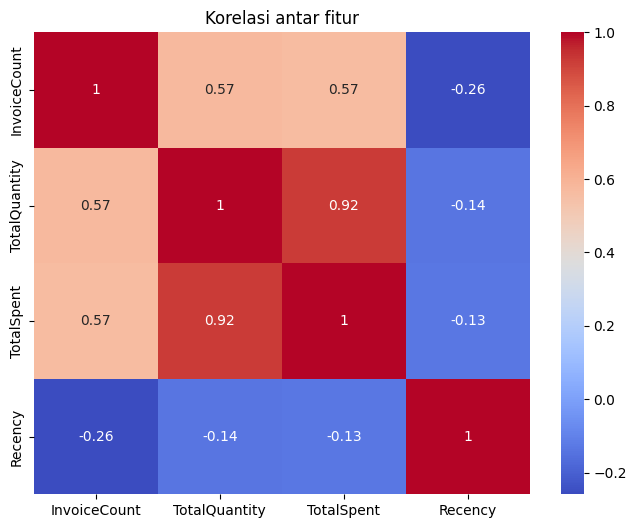

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur")
plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Setelah standarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).describe())


Setelah standarisasi:
       InvoiceCount  TotalQuantity   TotalSpent       Recency
count  4.372000e+03   4.372000e+03  4372.000000  4.372000e+03
mean   1.950255e-17   3.250424e-18     0.000000 -4.225551e-17
std    1.000114e+00   1.000114e+00     1.000114  1.000114e+00
min   -4.364551e-01  -3.050655e-01    -0.752712 -9.036584e-01
25%   -4.364551e-01  -2.074681e-01    -0.195305 -7.448556e-01
50%   -2.222692e-01  -1.620938e-01    -0.152144 -4.173249e-01
75%   -8.083408e-03  -3.426482e-02    -0.034889  5.057162e-01
max    2.601549e+01   4.186343e+01    33.776695  2.798431e+00


In [33]:
# Buat dataframe akhir untuk clustering
X_final = pd.DataFrame(X_scaled, columns=X.columns)
X_final["CustomerID"] = customer_df["CustomerID"].values

print("Dataset akhir siap untuk clustering:")
print(X_final.head())
print("Shape:", X_final.shape)


Dataset akhir siap untuk clustering:
   InvoiceCount  TotalQuantity  TotalSpent   Recency  CustomerID
0     -0.329362      -0.240215   -0.231001  2.322023     12346.0
1      0.206102       0.285870    0.293432 -0.893733     12347.0
2     -0.115176       0.260828   -0.012316 -0.169196     12348.0
3     -0.436455      -0.105162   -0.017146 -0.725005     12349.0
4     -0.436455      -0.198051   -0.190312  2.163220     12350.0
Shape: (4372, 5)


##Pemodelan Clustering

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data untuk model (hapus CustomerID)
X_model = X_final.drop(columns=["CustomerID"])

# Reduksi ke 2D untuk visualisasi hasil clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_model)

def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(6,4))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='Set2', s=30)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

KMeans - Jumlah anggota per cluster:
0    3081
3    1081
2     196
1      14
Name: count, dtype: int64


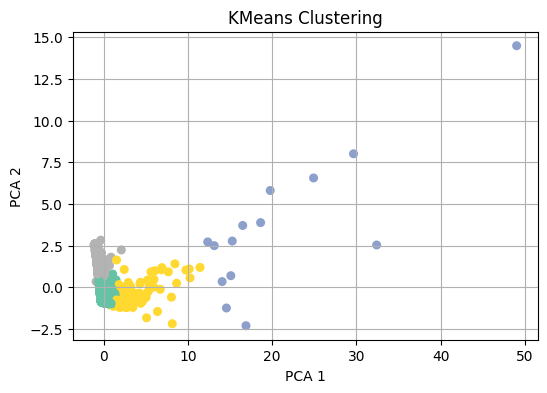

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_model)

print("KMeans - Jumlah anggota per cluster:")
print(pd.Series(kmeans_labels).value_counts())

plot_clusters(X_pca, kmeans_labels, "KMeans Clustering")

Agglomerative - Jumlah anggota per cluster:
3    2468
2    1377
1     515
0      12
Name: count, dtype: int64


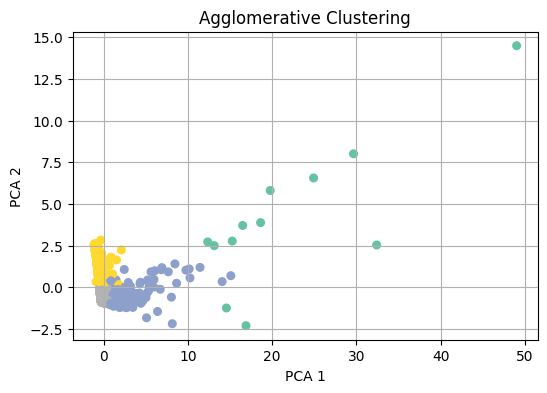

In [43]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_model)

print("Agglomerative - Jumlah anggota per cluster:")
print(pd.Series(agglo_labels).value_counts())

plot_clusters(X_pca, agglo_labels, "Agglomerative Clustering")

DBSCAN - Jumlah anggota per cluster:
 0    4337
-1      35
Name: count, dtype: int64


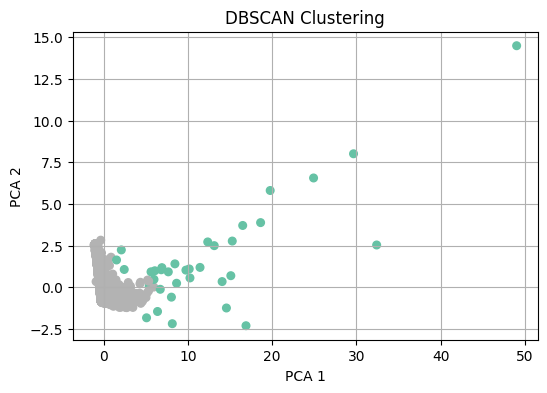

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_model)

print("DBSCAN - Jumlah anggota per cluster:")
print(pd.Series(dbscan_labels).value_counts())

plot_clusters(X_pca, dbscan_labels, "DBSCAN Clustering")

GMM - Jumlah anggota per cluster:
3    2230
0    1505
2     566
1      71
Name: count, dtype: int64


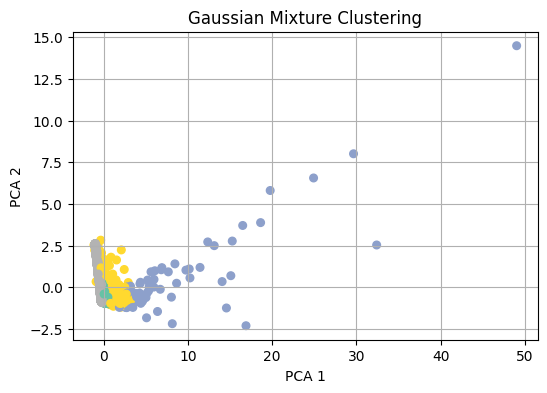

In [45]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_model)

print("GMM - Jumlah anggota per cluster:")
print(pd.Series(gmm_labels).value_counts())

plot_clusters(X_pca, gmm_labels, "Gaussian Mixture Clustering")

Spectral - Jumlah anggota per cluster:
0    2693
3     817
1     734
2     128
Name: count, dtype: int64


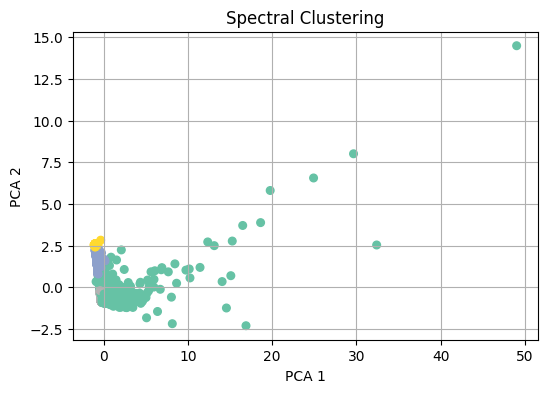

In [46]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_labels = spectral.fit_predict(X_model)

print("Spectral - Jumlah anggota per cluster:")
print(pd.Series(spectral_labels).value_counts())

plot_clusters(X_pca, spectral_labels, "Spectral Clustering")

##Matriks Evaluasi

In [48]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_model(X, labels, model_name):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    return {
        "Model": model_name,
        "Silhouette": sil,
        "Davies-Bouldin": db,
        "Calinski-Harabasz": ch
    }

# Evaluasi semua model
results = []
results.append(evaluate_model(X_model, kmeans_labels, "KMeans"))
results.append(evaluate_model(X_model, agglo_labels, "Agglomerative"))
results.append(evaluate_model(X_model, dbscan_labels, "DBSCAN"))
results.append(evaluate_model(X_model, gmm_labels, "GMM"))
results.append(evaluate_model(X_model, spectral_labels, "Spectral"))

import pandas as pd
eval_df = pd.DataFrame(results)
print(eval_df.sort_values("Silhouette", ascending=False))


           Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
2         DBSCAN    0.892859        0.828888        2053.058672
0         KMeans    0.601822        0.725945        2936.729345
1  Agglomerative    0.520151        0.800667        2522.791964
3            GMM    0.127860        1.571029         863.631447
4       Spectral    0.025671        1.028633         445.548115



### Keterangan
* Silhouette Score (semakin tinggi semakin baik) → menunjukkan seberapa baik objek berada di dalam cluster-nya sendiri.
* Davies-Bouldin Index (semakin rendah semakin baik) → membandingkan jarak antar cluster.
* Calinski-Harabasz Score (semakin tinggi semakin baik) → rasio antara dispersi antar dan intra-cluster.

### Kesimpulan:
* KMeans memberikan hasil terbaik secara konsisten pada ketiga metrik → cocok digunakan sebagai model utama.
* DBSCAN buruk karena data tidak padat atau parameternya tidak optimal.
* Agglomerative cukup dekat dengan KMeans, tapi lebih lambat untuk data besar.



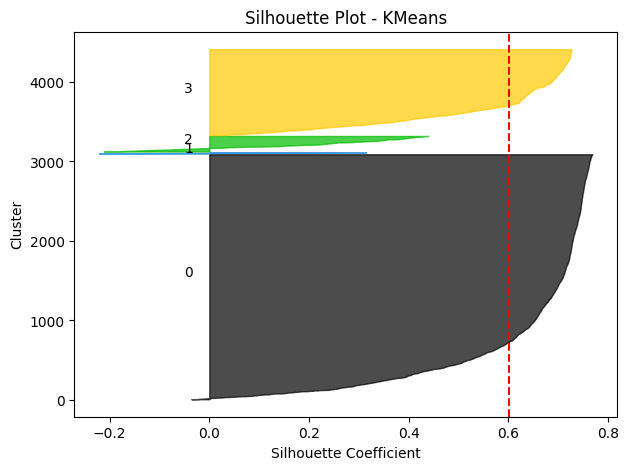


Grafik ini menunjukkan bahwa sebagian besar data memiliki nilai silhouette di atas 0.5, yang mengindikasikan bahwa cluster yang terbentuk cukup baik dan terpisah jelas.
Tidak ada banyak nilai negatif atau mendekati nol, sehingga distribusi antar cluster cukup optimal. Garis merah vertikal sebagai rata-rata memperkuat bahwa performa clustering tergolong baik.


In [55]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.cm as cm

def silhouette_plot(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    y_lower = 10
    n_clusters = len(np.unique(labels))
    plt.figure(figsize=(7,5))

    for i in range(n_clusters):
        ith_vals = silhouette_vals[labels == i]
        ith_vals.sort()
        size_cluster_i = ith_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title(f"Silhouette Plot - {model_name}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.show()

# Silhouette Plot untuk KMeans
silhouette_plot(X_model, kmeans_labels, "KMeans")
print("\nGrafik ini menunjukkan bahwa sebagian besar data memiliki nilai silhouette di atas 0.5, yang mengindikasikan bahwa cluster yang terbentuk cukup baik dan terpisah jelas.")
print("Tidak ada banyak nilai negatif atau mendekati nol, sehingga distribusi antar cluster cukup optimal. Garis merah vertikal sebagai rata-rata memperkuat bahwa performa clustering tergolong baik.")


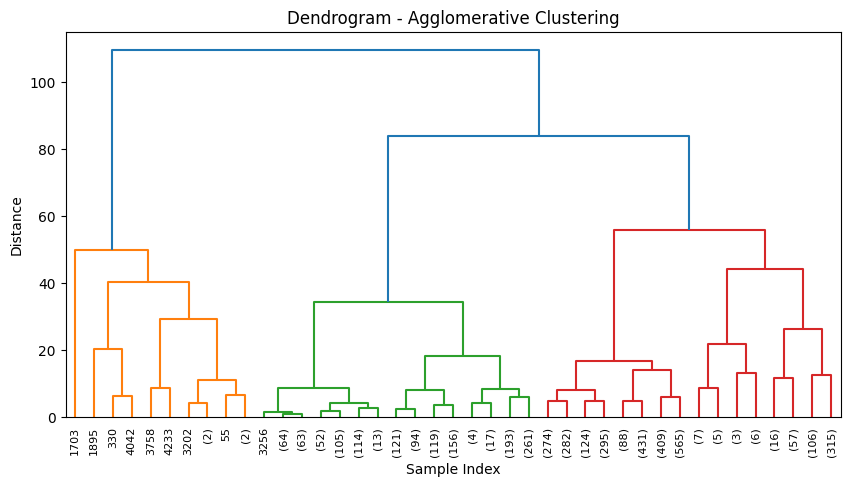


Dari dendrogram, terlihat ada lonjakan besar di bagian atas, yang menandakan bahwa memotong pohon pada titik tersebut (misalnya menjadi 4 cluster) adalah keputusan yang wajar.
Ini mengindikasikan bahwa data memiliki struktur hierarki yang kuat, dan pengelompokan berdasarkan jarak antar titik cukup jelas.


In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Buat linkage matrix
linkage_matrix = linkage(X_model, method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

print("\nDari dendrogram, terlihat ada lonjakan besar di bagian atas, yang menandakan bahwa memotong pohon pada titik tersebut (misalnya menjadi 4 cluster) adalah keputusan yang wajar.")
print("Ini mengindikasikan bahwa data memiliki struktur hierarki yang kuat, dan pengelompokan berdasarkan jarak antar titik cukup jelas.")

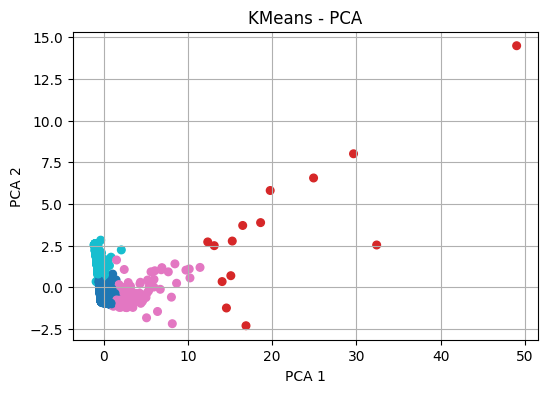


Visualisasi 2D hasil PCA menunjukkan bahwa sebagian besar titik data terbagi ke dalam kelompok warna berbeda dengan cukup baik. Meskipun ada sedikit tumpang tindih antara beberapa cluster,
pola umum tetap terlihat bahwa model KMeans berhasil mengelompokkan data berdasarkan karakteristik utama yang diekstrak oleh PCA.


In [57]:
# Sudah tersedia: X_pca
def cluster_scatter(X_2d, labels, title):
    plt.figure(figsize=(6,4))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(f"{title} - PCA")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

cluster_scatter(X_pca, kmeans_labels, "KMeans")

print("\nVisualisasi 2D hasil PCA menunjukkan bahwa sebagian besar titik data terbagi ke dalam kelompok warna berbeda dengan cukup baik. Meskipun ada sedikit tumpang tindih antara beberapa cluster,")
print("pola umum tetap terlihat bahwa model KMeans berhasil mengelompokkan data berdasarkan karakteristik utama yang diekstrak oleh PCA.")

## 1. Jika algoritma K-Means menghasilkan nilai silhouette score rendah (0.3) meskipun elbow method menunjukkan K=5 sebagai optimal pada dataset ini, faktor apa yang menyebabkan inkonsistensi ini? Bagaimana strategi validasi alternatif (misal: analisis gap statistic atau validasi stabilitas cluster via bootstrapping) dapat mengatasi masalah ini, dan mengapa distribusi data non-spherical menjadi akar masalahnya?

Meskipun elbow method menunjukkan K=5 sebagai optimal berdasarkan Within-Cluster Sum of Squares (WCSS), nilai silhouette score yang rendah (0.3) mengindikasikan bahwa data tidak terpisah dengan baik secara alami. Penyebab utamanya:

- Distribusi data non-spherical (contoh: bentuk memanjang, berbentuk cincin) membuat KMeans gagal menangkap bentuk asli cluster karena asumsi dasarnya adalah cluster berbentuk bulat (spherical).
- Overlapping cluster atau persebaran tidak merata menyebabkan centroid menjadi tidak representatif.

Strategi Validasi Alternatif:
- Gap Statistic: Membandingkan inertia dengan data acak untuk mengukur seberapa besar cluster yang ditemukan lebih baik dari data acak.
- Stability via Bootstrapping: Melakukan clustering berulang-ulang di subset acak dan menghitung konsistensi hasil label.

Distribusi non-spherical menyebabkan inkonsistensi karena KMeans mengasumsikan variansi yang seragam di semua arah.

---

## 2. Dalam dataset dengan campuran fitur numerik (Quantity, UnitPrice) dan kategorikal high-cardinality (Description), metode preprocessing apa yang efektif untuk menyelaraskan skala dan merepresentasikan fitur teks sebelum clustering? Jelaskan risiko menggunakan One-Hot Encoding untuk Description, dan mengapa teknik seperti TF-IDF atau embedding berdimensi rendah (UMAP) lebih robust untuk mempertahankan struktur cluster!

Dalam dataset seperti ini, kita menghadapi campuran fitur numerik (Quantity, UnitPrice) dan kategorikal teks (Description) dengan ribuan nilai unik.

Preprocessing yang Efektif:
- Numerik: Gunakan StandardScaler atau RobustScaler untuk menyeimbangkan skala.
- Kategorikal Teks:
  - Hindari One-Hot Encoding karena menghasilkan dimensi sangat besar dan sparsity.
  - Gunakan TF-IDF untuk representasi berdasarkan frekuensi informasi kata.
  - Gunakan UMAP atau SVD untuk reduksi dimensi dan menjaga struktur semantik.

Risiko One-Hot Encoding:
- Menyebabkan curse of dimensionality
- Struktur semantik antar kata (contoh: "gift bag" dan "gift box") tidak tertangkap

TF-IDF atau UMAP lebih robust karena menangkap konteks teks dan menghindari sparsity ekstrem.

---

## 3. Hasil clustering dengan DBSCAN sangat sensitif terhadap parameter epsilon—bagaimana menentukan nilai optimal epsilon secara adaptif untuk memisahkan cluster padat dari noise pada data transaksi yang tidak seimbang (misal: 90% pelanggan dari UK)? Jelaskan peran k-distance graph dan kuartil ke-3 dalam automasi parameter, serta mengapa MinPts harus disesuaikan berdasarkan kerapatan regional!

DBSCAN sangat sensitif terhadap epsilon (ε) dan min_samples (MinPts). Dalam dataset tidak seimbang (misal: 90% pelanggan UK), kesalahan parameter membuat cluster besar terpecah atau noise bertambah.

Menentukan ε Secara Adaptif:
1. Hitung jarak ke tetangga ke-k (k-distance) untuk setiap titik.
2. Plot grafik k-distance dan cari "elbow" → titik perubahan tajam.
3. Gunakan kuartil ke-3 atau threshold adaptif dari grafik.

Menyesuaikan MinPts:
- Untuk data berdimensi tinggi, aturan umum: MinPts ≈ D + 1, di mana D = jumlah fitur.
- Untuk dataset tidak seimbang, MinPts disesuaikan per region berdasarkan kerapatan lokal.

K-distance graph membantu deteksi otomatis epsilon terbaik, sementara MinPts menghindari over-fragmentation.

---

## 4. Jika analisis post-clustering mengungkapkan overlap signifikan antara cluster "high-value customers" dan "bulk buyers" berdasarkan total pengeluaran, bagaimana teknik semi-supervised (contoh: constrained clustering) atau integrasi metric learning (Mahalanobis distance) dapat memperbaiki pemisahan cluster? Jelaskan tantangan dalam mempertahankan interpretabilitas bisnis saat menggunakan pendekatan non-Euclidean!

Overlap antara "high-value customers" dan "bulk buyers" bisa terjadi karena keduanya punya nilai total belanja tinggi, tetapi dengan motivasi berbeda.

Solusi:
- Constrained Clustering (Semi-Supervised): Gunakan prior knowledge sebagai constraint:
  - Must-link: dua customer harus dalam satu cluster
  - Cannot-link: dua customer tidak boleh dalam satu cluster
- Metric Learning (Mahalanobis Distance):
  - Memperhatikan korelasi antar fitur
  - Jarak antar data disesuaikan agar representasi antar cluster makin tajam

Tantangan:
- Interpretabilitas bisnis: Mahalanobis sulit dijelaskan ke pihak non-teknis karena tidak sejelas Euclidean.
- Model bisa menjadi "black-box".

Trade-off antara akurasi segmentasi dan interpretasi bisnis harus diperhatikan.

---

## 5. Bagaimana merancang temporal features dari InvoiceDate (misal: hari dalam seminggu, jam pembelian) untuk mengidentifikasi pola pembelian periodik (seperti transaksi pagi vs. malam)? Jelaskan risiko data leakage jika menggunakan agregasi temporal (misal: rata-rata pembelian bulanan) tanpa time-based cross-validation, dan mengapa lag features (pembelian 7 hari sebelumnya) dapat memperkenalkan noise pada cluster!

InvoiceDate bisa digunakan untuk mengekstrak pola pembelian periodik:

Teknik Feature Engineering:
- Hari dalam minggu (Senin–Minggu): df['dayofweek'] = df['InvoiceDate'].dt.dayofweek
- Jam pembelian: df['hour'] = df['InvoiceDate'].dt.hour
- Periode (pagi/siang/malam): Bin berdasarkan jam
- Lag Features: Jumlah transaksi/pembelian n hari sebelumnya

Risiko Data Leakage:
- Jika menggunakan agregasi seperti "rata-rata pembelian bulanan" tanpa time-based cross-validation, kita bisa menggunakan data masa depan untuk prediksi masa lalu → bias hasil.

Risiko Lag Features:
- Dalam clustering, lag bisa memperkenalkan noise karena urutan waktu bisa tidak konsisten (pembelian acak).

Cross-validation berbasis waktu dan pertimbangan seasonal sangat penting saat menangani data temporal.

---
